In [1]:
# Just the normal prequisites for using matplotlib and numpy in a Jupyter notebook
%matplotlib inline
# Use the svg backend, in my opinion it just makes better looking plots
%config InlineBackend.figure_format = 'svg'

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging( logging_level='DEBUG')

import os
import sys
from pathlib import Path
import IPython
from scipy import signal
import scipy.fftpack
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Math import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import unittest

directory_path = Path(os.path.abspath('')).resolve().parent.parent
spice_libraries_path = directory_path.joinpath("lib", "spice")
spice_library = SpiceLibrary(spice_libraries_path)

directory_path = Path(os.path.abspath('')).resolve()

2020-12-13 16:37:43,165 - PySpice.Spice.Netlist.__new__ - DEBUG - Element don't define a __pins__ attribute
2020-12-13 16:37:43,165 - PySpice.Spice.Netlist.__new__ - DEBUG - FixedPinElement don't define a __pins__ attribute
2020-12-13 16:37:43,166 - PySpice.Spice.Netlist.__new__ - DEBUG - SubCircuitElement don't define a __pins__ attribute
2020-12-13 16:37:43,170 - PySpice.Spice.Netlist.__new__ - DEBUG - Resistor don't define a __pins__ attribute
2020-12-13 16:37:43,173 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorResistor don't define a __pins__ attribute
2020-12-13 16:37:43,177 - PySpice.Spice.Netlist.__new__ - DEBUG - BehavioralResistor don't define a __pins__ attribute
2020-12-13 16:37:43,181 - PySpice.Spice.Netlist.__new__ - DEBUG - Capacitor don't define a __pins__ attribute
2020-12-13 16:37:43,183 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorCapacitor don't define a __pins__ attribute
2020-12-13 16:37:43,185 - PySpice.Spice.Netlist.__new__ - DEBUG - Behaviora

![module](https://img.shields.io/badge/module-vca-yellow) ![status](https://img.shields.io/badge/status-work%20in%20progress-orange)

## *übergang*

<a href="https://photos.app.goo.gl/pg6iZUC32rTKX5LC7"><img src="https://spielhuus.github.io/elektrophon/images/kontrast-logo-tmb.jpg" height="300px" align="right"></a>

***table of contents***

* [*about*](#about)
* [*construction*](#construction)
* [*calibration*](#calibration)
* [*usage*](#usage)
* [*credits*](#credits)
* [*links*](#links)
* [*changelog*](#changelog)
  
<br/><br/><br/><br/>

## *about*


In [2]:
#load the diffpair schema
kicad_netlist_path = directory_path.joinpath('main', 'main.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

2020-12-13 16:37:46,841 - PySpice.Spice.Parser.SpiceParser._parse - WARNING - Parser ignored: .option savecurrents 


In [3]:
#simulate interpolating scanner
scanner = parser.build_circuit(ground=5)
scanner.include(spice_library['TL072'])
scanner.include(spice_library['TL072c'])
scanner.include(spice_library['LT1014x_30V'])
scanner.include(spice_library['BC556B'])
#scanner.include(spice_library['BC857CW'])
scanner.include(spice_library['LM13700/NS'])
scanner.include(spice_library['LM13700d'])
scanner.include(spice_library['D1N4148'])
scanner.V('1', '+15V', scanner.gnd, 'DC 15')
scanner.V('2', '-15V', scanner.gnd, 'DC -15')
scanner.V('3', 'IN_1', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 400)')
scanner.V('4', 'IN_2', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 800)')
scanner.V('5', 'IN_3', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 1200)')
scanner.V('6', 'IN_4', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 1600)')
scanner.V('7', 'CV_IN', scanner.gnd, 'DC 0V AC 0V PULSE(0V 5V 0 20m 0m 1u 20m)') 

#for q in (scanner.Q1, scanner.Q2, scanner.Q3, scanner.Q4):
#    q.collector.add_current_probe(scanner)

for q in (scanner.R5, scanner.R17, scanner.R18, scanner.R19):
    q.minus.add_current_probe(scanner)

simulator = scanner.simulator(temperature=25, nominal_temperature=25)
analysis_scanner = simulator.transient(step_time=1@u_us, end_time=20@u_ms)


2020-12-13 16:37:47,032 - PySpice.Spice.Parser.Element.build - DEBUG - R 6 ['Net-_R4-Pad2_', 'GND'] ['15k'] {}
2020-12-13 16:37:47,034 - PySpice.Spice.Parser.Element.build - DEBUG - R 4 ['Net-_R3-Pad2_', 'Net-_R4-Pad2_'] ['47k'] {}
2020-12-13 16:37:47,037 - PySpice.Spice.Parser.Element.build - DEBUG - R 3 ['Net-_R2-Pad2_', 'Net-_R3-Pad2_'] ['47k'] {}
2020-12-13 16:37:47,041 - PySpice.Spice.Parser.Element.build - DEBUG - R 2 ['Net-_R1-Pad2_', 'Net-_R2-Pad2_'] ['47k'] {}
2020-12-13 16:37:47,043 - PySpice.Spice.Parser.Element.build - DEBUG - R 1 ['+15V', 'Net-_R1-Pad2_'] ['330k'] {}
2020-12-13 16:37:47,044 - PySpice.Spice.Parser.Element.build - DEBUG - R 7 ['Net-_R12-Pad2_', 'CV_S'] ['47k'] {}
2020-12-13 16:37:47,046 - PySpice.Spice.Parser.Element.build - DEBUG - R 8 ['Net-_R13-Pad2_', 'CV_S'] ['47k'] {}
2020-12-13 16:37:47,047 - PySpice.Spice.Parser.Element.build - DEBUG - R 9 ['Net-_R14-Pad2_', 'CV_S'] ['47k'] {}
2020-12-13 16:37:47,052 - PySpice.Spice.Parser.Element.build - DEBUG - R 1

In [9]:
for node in analysis_scanner.branches.values():
    print( node )
#    print('Node {}: {:5.2f} A'.format(str(node), float(node))) # Fixme: format value + unit

print( analysis_scanner['vr5_minus'] )
for a in analysis_scanner['vr5_minus'] :
    print( u_mA( a ) )


vr5_minus
-0.01565221827704022 mA
-0.015652218280592933 mA
-0.015652218284145647 mA
-0.015652218284145647 mA
-0.01565221828769836 mA
-0.015652218284145647 mA
-0.015652218284145647 mA
-0.015652218284145647 mA
-0.01565221827704022 mA
-0.015652218284145647 mA
-0.015652218280592933 mA
-0.015652218291251074 mA
-0.015652218301909215 mA
-0.01565221832677821 mA
-0.0156522184013852 mA
-0.015652218593231737 mA
-0.015652219094164366 mA
-0.015652219747863683 mA
-0.015652220483275414 mA
-0.015652221279083278 mA
-0.015652222106865565 mA
-0.01565222295241142 mA
-0.01565222381927356 mA
-0.015652224675477555 mA
-0.015652225552997834 mA
-0.01565222641985997 mA
-0.015652227300932964 mA
-0.015652228178453242 mA
-0.01565222905597352 mA
-0.01565222992283566 mA
-0.01565223081101408 mA
-0.01565223168142893 mA
-0.01565223256960735 mA
-0.015652233432916773 mA
-0.015652234310437052 mA
-0.015652235198615472 mA
-0.015652236069030323 mA
-0.01565223695365603 mA
-0.015652237838281735 mA
-0.015652238708696586 mA
-0.01

In [ ]:
class TestInputVoltages(unittest.TestCase):
    
    def test_input_audio(self):
        self.assertAlmostEqual(10@u_mV, np.max( np.array( analysis_scanner[ 'IN_1_S' ] ) ), places=1, msg='scaled audio input max voltage')
        self.assertAlmostEqual(-10@u_mV, np.min( np.array( analysis_scanner[ 'IN_1_S' ] ) ), places=1, msg='scaled audio input min voltage')

    def test_input_cv(self):
        self.assertAlmostEqual(5@u_V, np.max( np.array( analysis_scanner[ 'CV_S' ] ) ), places=1, msg='scaled audio input max voltage')
        self.assertAlmostEqual(0@u_V, np.min( np.array( analysis_scanner[ 'CV_S' ] ) ), places=1, msg='scaled audio input min voltage')


In [ ]:
print( "the voltage dividers: R1: %.1fV, R2: %.1fV, R3: %.1fV, R4: %.1fV" % (np.average( np.array( analysis_scanner[ 'Net-_R1-Pad2_' ] ) ), np.average( np.array( analysis_scanner[ 'Net-_R2-Pad2_' ] ) ), np.average( np.array( analysis_scanner[ 'Net-_R3-Pad2_' ] ) ), np.average( np.array( analysis_scanner[ 'Net-_R4-Pad2_' ] ) )) )

In [ ]:
class TestVoltageDivider(unittest.TestCase):
    
    def test_voltage_divider(self):
        self.assertAlmostEqual(4.5@u_V, np.average( np.array( analysis_scanner[ 'Net-_R1-Pad2_' ] ) ), places=1, msg='voltage divider R1')
        self.assertAlmostEqual(3.3@u_V, np.average( np.array( analysis_scanner[ 'Net-_R2-Pad2_' ] ) ), places=1, msg='voltage divider R2')
        self.assertAlmostEqual(2.1@u_V, np.average( np.array( analysis_scanner[ 'Net-_R3-Pad2_' ] ) ), places=1, msg='voltage divider R3')
        self.assertAlmostEqual(0.9@u_V, np.average( np.array( analysis_scanner[ 'Net-_R4-Pad2_' ] ) ), places=1, msg='voltage divider R4')



In [ ]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot cv
ax0.plot(analysis_scanner['CV_S'].abscissa*1000, analysis_scanner['CV_S'], c='DarkGrey')  # envelope input (scaled)

#plot the voltages
ax0.plot(analysis_scanner['Net-_R1-Pad2_'].abscissa*1000, analysis_scanner['Net-_R1-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R2-Pad2_'].abscissa*1000, analysis_scanner['Net-_R2-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R3-Pad2_'].abscissa*1000, analysis_scanner['Net-_R3-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R4-Pad2_'].abscissa*1000, analysis_scanner['Net-_R4-Pad2_'], c='Grey')  # envelope input (scaled)

#plot output of the opamps
ax0.plot(analysis_scanner['Net-_Q1-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad2_'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q4-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad2_'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q2-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad2_'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q3-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad2_'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()


In [ ]:
for node in analysis_scanner.branches.values():
    print( node )

2020-12-13 16:41:54,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT


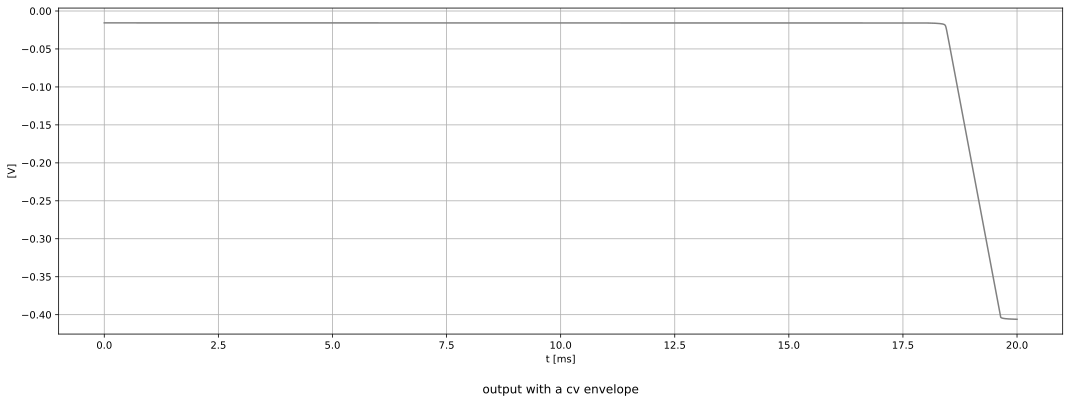

In [10]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot cv
#ax0.plot(analysis_scanner['CV_S'].abscissa*1000, analysis_scanner['CV_S'], c='DarkGrey')  # envelope input (scaled)

#plot the voltages
ax0.plot(analysis_scanner['CV_S'].abscissa*1000, u_mA(analysis_scanner['vr5_minus']), c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['CV_S'].abscissa*1000, u_mA(analysis_scanner['vr5_minus']), c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['CV_S'].abscissa*1000, u_mA(analysis_scanner['vr5_minus']), c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['CV_S'].abscissa*1000, u_mA(analysis_scanner['vr5_minus']), c='Grey')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

In [ ]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot the envelopes
ax0.plot(analysis_scanner['Net-_Q1-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad3_'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q2-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad3_'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q3-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad3_'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q4-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad3_'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

In [ ]:
#simulate interpolating scanner
scanner = parser.build_circuit(ground=5)
scanner.include(spice_library['TL072'])
scanner.include(spice_library['TL072c'])
scanner.include(spice_library['LT1014x_30V'])
scanner.include(spice_library['BC556B'])
#scanner.include(spice_library['BC857CW'])
scanner.include(spice_library['LM13700/NS'])
scanner.include(spice_library['LM13700d'])
scanner.include(spice_library['D1N4148'])
scanner.V('1', '+15V', scanner.gnd, 'DC 15')
scanner.V('2', '-15V', scanner.gnd, 'DC -15')
scanner.V('3', 'IN_1', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 400)')
scanner.V('4', 'IN_2', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 800)')
scanner.V('5', 'IN_3', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 1200)')
scanner.V('6', 'IN_4', scanner.gnd, 'DC 0V AC 0V SIN(0 1V 1600)')
scanner.V('7', 'CV_IN', scanner.gnd, 'DC 0V AC 0V PULSE(0V 5V 0 20m 0m 1u 20m)') 
simulator = scanner.simulator(temperature=25, nominal_temperature=25)
analysis_scanner = simulator.transient(step_time=1@u_us, end_time=40@u_ms)


In [ ]:
for nodes in analysis_scanner.branches :
    print( nodes )
    

In [ ]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot with envelope
ax0.plot(analysis_scanner['Net-_Q1-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad3_'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q2-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad3_'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q3-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad3_'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q4-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad3_'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

In [ ]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot with envelope
ax0.plot(analysis_scanner['OUT'].abscissa*1000, analysis_scanner['OUT'], c='Red')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

## *construction*

for the final circuit input and output buffering and biasing is needed. the buffering is done with opamps. 


first we design the input stage. the input voltage for the X signal should be 10mV and 20mV for the control voltage.


## *references*

- [Muffwigler][1] thread with schematic from electrouwe

[1]: https://www.muffwiggler.com/forum/viewtopic.php?f=17&t=241171&start=25




In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)